**Customer Churn Prediction**
using default logistic regression, random forest, and gradient boosting models.

In [1]:
#Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

In [3]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [4]:
print(df_load.info(), '\n')
print(df_load['Churn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB
None 

No     5114
Yes    1836
Name: Churn, dtype: int64


* UpdatedAt : Periode of Data taken
* customerID : Customer ID
* gender : Whether the customer is a male or a female (Male, Female)
* SeniorCitizen : Whether the customer is a senior citizen or not (Yes, No)
* Partner : Whether the customer has a partner or not (Yes, No)
* tenure : Number of months the customer has stayed with the company
* PhoneService : Whether the customer has a phone service or not (Yes, No)
* InternetService : Customer’s internet service provider (Yes, No)
* StreamingTV : Whether the customer has streaming TV or not (Yes, No)
* PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* MonthlyCharges : The amount charged to the customer monthly
* TotalCharges : The total amount charged to the customer
* (target label) Churn : Whether the customer churned or not (Yes, No)

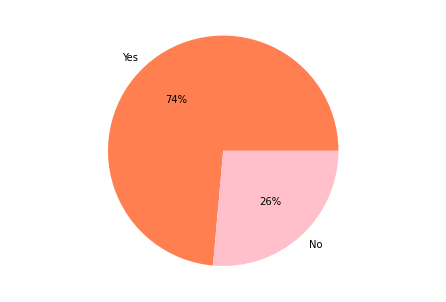

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%', colors=('coral','pink'))
plt.show()

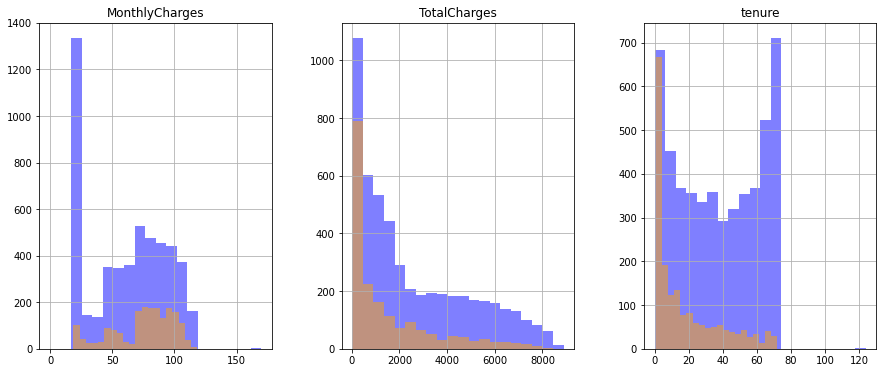

In [6]:
#EDA variabel numerik

#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

* MonthlyCharges ada kecenderungan: semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn. 
* Untuk TotalCharges terlihat tidak ada kecenderungan apapun terhadap Churn customers. 
* Untuk tenure ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn

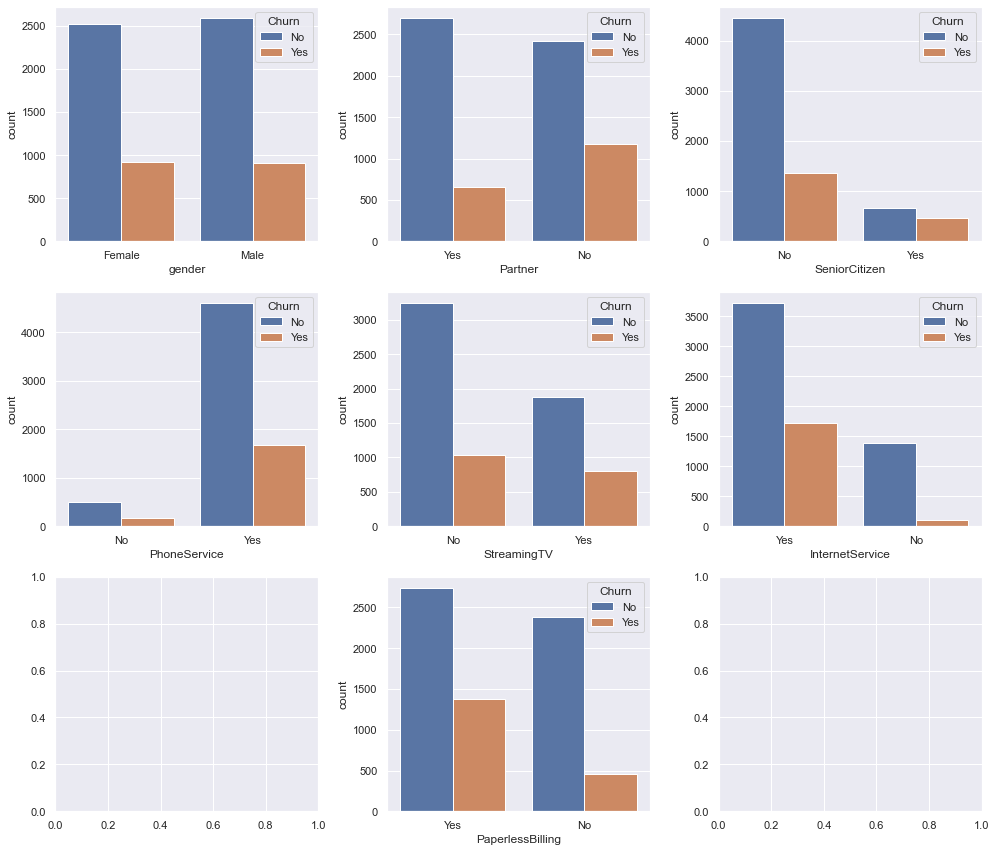

In [7]:
#EDA varibel kategorik

sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

* Tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin (gender) dan layanan telfonnya (PhoneService). 
* Ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner (partner: No), orang-orang yang statusnya adalah senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).

In [4]:
#Remove unnecessary columns : customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [5]:
encoded_columns = pd.get_dummies(cleaned_df['gender'])
cleaned_df  = cleaned_df.join(encoded_columns).drop('gender', axis=1)

encoded_columns = pd.get_dummies(cleaned_df['SeniorCitizen'], prefix='SeniorCitizen')
cleaned_df  = cleaned_df.join(encoded_columns).drop('SeniorCitizen', axis=1)

encoded_columns = pd.get_dummies(cleaned_df['Partner'], prefix='Partner')
cleaned_df  = cleaned_df.join(encoded_columns).drop('Partner', axis=1)

encoded_columns = pd.get_dummies(cleaned_df['PhoneService'], prefix='PhoneService')
cleaned_df  = cleaned_df.join(encoded_columns).drop('PhoneService', axis=1)

encoded_columns = pd.get_dummies(cleaned_df['StreamingTV'], prefix='StreamTV')
cleaned_df  = cleaned_df.join(encoded_columns).drop('StreamingTV', axis=1)

encoded_columns = pd.get_dummies(cleaned_df['PaperlessBilling'], prefix='PaperlessBilling')
cleaned_df  = cleaned_df.join(encoded_columns).drop('PaperlessBilling', axis=1)

encoded_columns = pd.get_dummies(cleaned_df['InternetService'], prefix='InternetService')
cleaned_df  = cleaned_df.join(encoded_columns).drop('InternetService', axis=1)

In [6]:
cleaned_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,Female,Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,PhoneService_No,PhoneService_Yes,StreamTV_No,StreamTV_Yes,PaperlessBilling_No,PaperlessBilling_Yes,InternetService_No,InternetService_Yes
0,1,29.85,29.85,No,1,0,1,0,0,1,1,0,1,0,0,1,0,1
1,60,20.50,1198.80,No,0,1,1,0,0,1,0,1,1,0,0,1,1,0
2,5,104.10,541.90,Yes,0,1,1,0,1,0,0,1,0,1,1,0,0,1
3,72,115.50,8312.75,No,1,0,1,0,0,1,0,1,0,1,0,1,0,1
4,56,81.25,4620.40,No,1,0,1,0,0,1,0,1,0,1,1,0,0,1


In [10]:
#Encode kolom yang kategorik ke numerik
#Convert all the non-numeric columns to numerical data types
#for column in cleaned_df.columns:
   # if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    #cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
#cleaned_df.describe()

C:\Users\Hp\anaconda3\envs\Python36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.415827,0.903741,0.384317,0.783453,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.561336,0.294967,0.486468,0.411921,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,73.000000,1.000000,1.000000,1.000000,1.000000,169.931250,8889.131250,1.000000


In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cleaned_df['Churn']= label_encoder.fit_transform(cleaned_df['Churn']) 

In [7]:
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', X_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 17) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 17) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


In [8]:
log_model = LogisticRegression(solver ='lbfgs', max_iter = 100)
log_model.fit(X_train,y_train) #train data
y_pred = log_model.predict(X_test) # test data
y_true = y_test

In [13]:
from sklearn import metrics
print("Accuracy Train:   ", log_model.score(X_train,y_train))
print("Accuracy Test:   ", log_model.score(X_test,y_test))
f1_lr = metrics.f1_score(y_true, y_pred, average='weighted')
print("F Score:   ", f1_lr)

Accuracy Train:    0.7946557040082219
Accuracy Test:    0.7899280575539568
F Score:    0.7807218441741451


In [14]:
# Predict
# Print classification report 
print('Classification Report Logistic Regression in Test Data :')
print(classification_report(y_true, y_pred))

Classification Report Logistic Regression in Test Data :
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1539
           1       0.63      0.49      0.55       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



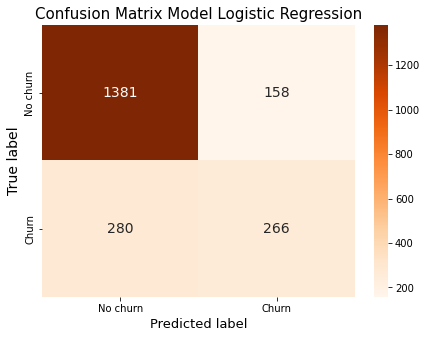

In [15]:
plt.figure(figsize=(7,5))
cf_matrix = pd.DataFrame((confusion_matrix(y_true, y_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
ax = sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Oranges', annot_kws={'size': 14})
plt.title("Confusion Matrix Model Logistic Regression", fontsize=15)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=13)
plt.show()

In [42]:
#Train the model RandomForestClassifier
rdf_model = RandomForestClassifier(max_depth=80, n_estimators=100, class_weight = 'balanced', max_features='auto')
rdf_model = rdf_model.fit(X_train,y_train) #train data
y_pred = rdf_model.predict(X_test) # test data
y_true = y_test

In [43]:
print("Accuracy Train:   ", rdf_model.score(X_train,y_train))
print("Accuracy Test:   ", rdf_model.score(X_test,y_test))
f1_rdf = metrics.f1_score(y_true, y_pred, average='weighted')
print("F Score:   ", f1_rdf)

Accuracy Train:    0.9954779033915725
Accuracy Test:    0.7688249400479616
F Score:    0.7617265632241077


In [44]:
print('Classification Report Random Forest in Test Data :')
print(classification_report(y_true, y_pred))

Classification Report Random Forest in Test Data :
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1539
           1       0.57      0.48      0.52       546

    accuracy                           0.77      2085
   macro avg       0.70      0.67      0.68      2085
weighted avg       0.76      0.77      0.76      2085



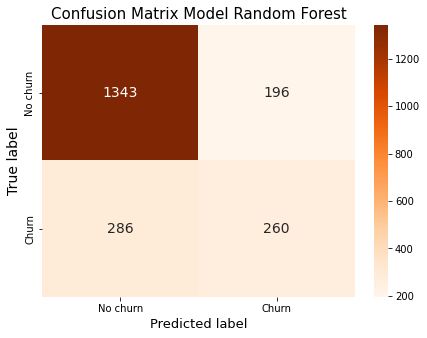

In [45]:
plt.figure(figsize=(7,5))
cf_matrix = pd.DataFrame((confusion_matrix(y_true, y_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
ax = sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Oranges', annot_kws={'size': 14})
plt.title("Confusion Matrix Model Random Forest", fontsize=15)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=13)
plt.show()

In [46]:
#GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier(n_estimators=200, random_state=42)
gbt_model = gbt_model.fit(X_train, y_train) #train da
y_pred = gbt_model.predict(X_test) # test data
y_true = y_test

In [47]:
print("Accuracy Train:   ", gbt_model.score(X_train,y_train))
print("Accuracy Test:   ", gbt_model.score(X_test,y_test))
f1_gb = metrics.f1_score(y_true, y_pred, average='weighted')
print("F Score:   ", f1_gb)

Accuracy Train:    0.8359712230215828
Accuracy Test:    0.7841726618705036
F Score:    0.7745280528226847


In [48]:
print('Classification Report Gradient Boosting in Test Data :')
print(classification_report(y_true, y_pred))

Classification Report Gradient Boosting in Test Data :
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.61      0.47      0.54       546

    accuracy                           0.78      2085
   macro avg       0.72      0.68      0.70      2085
weighted avg       0.77      0.78      0.77      2085



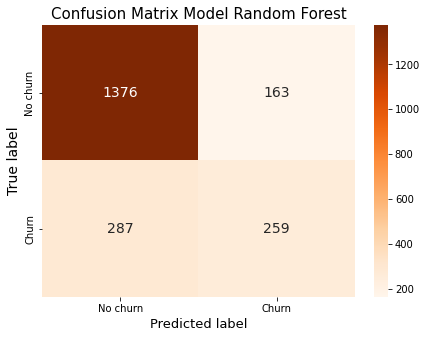

In [49]:
plt.figure(figsize=(7,5))
cf_matrix = pd.DataFrame((confusion_matrix(y_true, y_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
ax = sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Oranges', annot_kws={'size': 14})
plt.title("Confusion Matrix Model Random Forest", fontsize=15)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=13)
plt.show()

In [54]:
svm_model = svm.SVC(C=1, kernel='linear', gamma='scale')
svm_model = svm_model.fit(X_train, y_train) #train data
y_pred = svm_model.predict(X_test) # test data
y_true = y_test

In [55]:
print("Accuracy Train:   ", svm_model.score(X_train,y_train))
print("Accuracy Test:   ", svm_model.score(X_test,y_test))
f1_svm = metrics.f1_score(y_true, y_pred, average='weighted')
print("F Score:   ", f1_svm)

Accuracy Train:    0.7911613566289826
Accuracy Test:    0.7851318944844125
F Score:    0.7651935865031054


In [56]:
print('Classification Report SVM in Test Data :')
print(classification_report(y_true, y_pred))

Classification Report SVM in Test Data :
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1539
           1       0.65      0.39      0.49       546

    accuracy                           0.79      2085
   macro avg       0.73      0.66      0.68      2085
weighted avg       0.77      0.79      0.77      2085



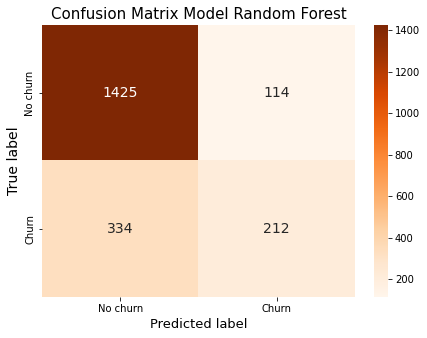

In [57]:
plt.figure(figsize=(7,5))
cf_matrix = pd.DataFrame((confusion_matrix(y_true, y_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
ax = sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Oranges', annot_kws={'size': 14})
plt.title("Confusion Matrix Model Random Forest", fontsize=15)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=13)
plt.show()